<a href="https://colab.research.google.com/github/wojr21/courses/blob/main/DS_bootcamp_exercises/121_130_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.18.5'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [2]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [3]:
google = fetch_financial_data(company = 'GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-14,1770.72,1789.20,1749.1300,1752.26,1626039
2020-12-11,1760.00,1777.31,1752.7400,1774.80,931431
2020-12-10,1762.60,1774.99,1733.5270,1767.65,1434411
2020-12-09,1810.36,1828.37,1762.0001,1777.86,1585578
2020-12-08,1808.52,1815.97,1791.2800,1811.33,996317
...,...,...,...,...,...
2015-12-23,770.69,771.90,757.6500,768.51,1529700
2015-12-22,764.27,770.34,761.2000,767.13,1816845
2015-12-21,763.05,766.35,754.1500,760.80,1742300


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-12-14 to 2015-12-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [7]:
google.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1257.0,1.090331e+03,254.746150,682.490,849.48,1086.00,1227.00,1820.54
High,1257.0,1.100785e+03,258.768414,683.325,853.79,1098.00,1239.68,1843.83
Low,1257.0,1.079822e+03,251.683164,672.660,846.71,1072.27,1216.47,1817.00
Close,1257.0,1.090715e+03,255.332865,681.140,849.87,1085.09,1228.00,1824.97
Volume,1257.0,1.746102e+06,858880.989027,521141.000,1200908.00,1534347.00,1997999.00,6658855.00


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [13]:
pd.set_option('precision', 2)
google

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-14,1770.72,1789.20,1749.13,1752.26,1626039
2020-12-11,1760.00,1777.31,1752.74,1774.80,931431
2020-12-10,1762.60,1774.99,1733.53,1767.65,1434411
2020-12-09,1810.36,1828.37,1762.00,1777.86,1585578
2020-12-08,1808.52,1815.97,1791.28,1811.33,996317
...,...,...,...,...,...
2015-12-23,770.69,771.90,757.65,768.51,1529700
2015-12-22,764.27,770.34,761.20,767.13,1816845
2015-12-21,763.05,766.35,754.15,760.80,1742300


__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [14]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,1090.33,1100.79,1079.82,1090.72,1746101.80
std,254.75,258.77,251.68,255.33,858880.99
min,682.49,683.33,672.66,681.14,521141.00
25%,849.48,853.79,846.71,849.87,1200908.00
50%,1086.00,1098.00,1072.27,1085.09,1534347.00
75%,1227.00,1239.68,1216.47,1228.00,1997999.00
max,1820.54,1843.83,1817.00,1824.97,6658855.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

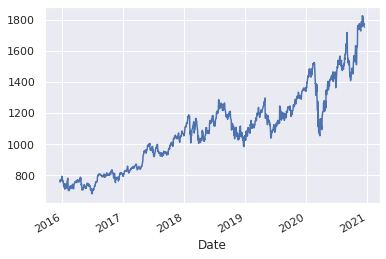

In [17]:
_ = google['Close'].plot(kind = 'line')

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [18]:
google = google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2020-12-14,1770.72,1789.20,1749.13,1752.26,1626039
1,2020-12-11,1760.00,1777.31,1752.74,1774.80,931431
2,2020-12-10,1762.60,1774.99,1733.53,1767.65,1434411
3,2020-12-09,1810.36,1828.37,1762.00,1777.86,1585578
4,2020-12-08,1808.52,1815.97,1791.28,1811.33,996317
...,...,...,...,...,...,...
1252,2015-12-23,770.69,771.90,757.65,768.51,1529700
1253,2015-12-22,764.27,770.34,761.20,767.13,1816845
1254,2015-12-21,763.05,766.35,754.15,760.80,1742300
1255,2015-12-18,767.23,774.14,756.59,756.85,3389700


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [21]:
google['Month'] = google['Date'].dt.month
google['Year'] = google['Date'].dt.year
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2020-12-14,1770.72,1789.20,1749.13,1752.26,1626039,12,2020
1,2020-12-11,1760.00,1777.31,1752.74,1774.80,931431,12,2020
2,2020-12-10,1762.60,1774.99,1733.53,1767.65,1434411,12,2020
3,2020-12-09,1810.36,1828.37,1762.00,1777.86,1585578,12,2020
4,2020-12-08,1808.52,1815.97,1791.28,1811.33,996317,12,2020
...,...,...,...,...,...,...,...,...
1252,2015-12-23,770.69,771.90,757.65,768.51,1529700,12,2015
1253,2015-12-22,764.27,770.34,761.20,767.13,1816845,12,2015
1254,2015-12-21,763.05,766.35,754.15,760.80,1742300,12,2015
1255,2015-12-18,767.23,774.14,756.59,756.85,3389700,12,2015


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [23]:
google.groupby('Year')['Close'].mean()

Year
2015    773.35
2016    763.21
2017    939.77
2018   1122.05
2019   1191.22
2020   1465.82
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

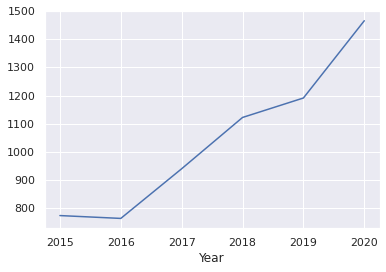

In [24]:
_ = google.groupby('Year')['Close'].mean().plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [25]:
google.groupby('Month')['Close'].mean()

Month
1    1052.83
2    1044.11
3    1008.99
4    1027.07
5    1057.08
6    1070.44
7    1123.99
8    1133.65
9    1133.02
10   1145.27
11   1182.34
12   1105.60
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

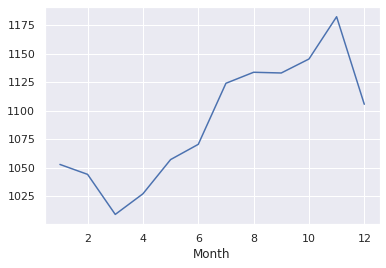

In [26]:
_ = google.groupby('Month')['Close'].mean().plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [28]:
google.groupby(['Year', 'Month'])['Close'].mean()

Year  Month
2015  12       773.35
2016  1        736.58
      2        724.39
      3        746.79
      4        756.66
                ...  
2020  8       1545.02
      9       1511.50
      10      1541.92
      11      1743.39
      12      1796.69
Name: Close, Length: 61, dtype: float64

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [30]:
google['Close'].argmax()

8

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [33]:
google.iloc[[google['Close'].argmax()]]

,Date,Open,High,Low,Close,Volume,Month,Year
8,2020-12-02,1795.36,1832.74,1785.17,1824.97,1471235,12,2020


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [34]:
google.loc[:, ['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2020-12-14,1770.72,1752.26,1626039
1,2020-12-11,1760.00,1774.80,931431
2,2020-12-10,1762.60,1767.65,1434411
3,2020-12-09,1810.36,1777.86,1585578
4,2020-12-08,1808.52,1811.33,996317
...,...,...,...,...
1252,2015-12-23,770.69,768.51,1529700
1253,2015-12-22,764.27,767.13,1816845
1254,2015-12-21,763.05,760.80,1742300
1255,2015-12-18,767.23,756.85,3389700


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [36]:
google = google.set_index('Date')
google

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2020-12-14,1770.72,1789.20,1749.13,1752.26,1626039,12,2020
2020-12-11,1760.00,1777.31,1752.74,1774.80,931431,12,2020
2020-12-10,1762.60,1774.99,1733.53,1767.65,1434411,12,2020
2020-12-09,1810.36,1828.37,1762.00,1777.86,1585578,12,2020
2020-12-08,1808.52,1815.97,1791.28,1811.33,996317,12,2020
...,...,...,...,...,...,...,...
2015-12-23,770.69,771.90,757.65,768.51,1529700,12,2015
2015-12-22,764.27,770.34,761.20,767.13,1816845,12,2015
2015-12-21,763.05,766.35,754.15,760.80,1742300,12,2015


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [37]:
google = google.drop(['Year', 'Month'], axis = 1)
google

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-14,1770.72,1789.20,1749.13,1752.26,1626039
2020-12-11,1760.00,1777.31,1752.74,1774.80,931431
2020-12-10,1762.60,1774.99,1733.53,1767.65,1434411
2020-12-09,1810.36,1828.37,1762.00,1777.86,1585578
2020-12-08,1808.52,1815.97,1791.28,1811.33,996317
...,...,...,...,...,...
2015-12-23,770.69,771.90,757.65,768.51,1529700
2015-12-22,764.27,770.34,761.20,767.13,1816845
2015-12-21,763.05,766.35,754.15,760.80,1742300


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [38]:
google.columns = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2020-12-14,1770.72,1789.20,1749.13,1752.26,1626039
2020-12-11,1760.00,1777.31,1752.74,1774.80,931431
2020-12-10,1762.60,1774.99,1733.53,1767.65,1434411
2020-12-09,1810.36,1828.37,1762.00,1777.86,1585578
2020-12-08,1808.52,1815.97,1791.28,1811.33,996317
...,...,...,...,...,...
2015-12-23,770.69,771.90,757.65,768.51,1529700
2015-12-22,764.27,770.34,761.20,767.13,1816845
2015-12-21,763.05,766.35,754.15,760.80,1742300
